# Meaning of column headings
1. <font color='red'><strong>Age</strong></font> is the age of candidate.
1. <font color='red'><strong>Sex</strong></font> has numeric values. 1 denotes male and 0 denotes female.
1. <font color='red'><strong>Chest Pain</strong></font> pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
1. <font color='red'><strong>Resting blood pressure</strong></font> is normal pressure with no exercise.
1. <font color='red'><strong>Cholesterol</strong></font> means the blockage for blood supply in the blood vessels.
1. <font color='red'><strong>Fasting Blood Pressure</strong></font> is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
1. <font color='red'><strong>Rest ECG</strong></font> results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.
1. The <font color='red'><strong>Maximum Heart Rate</strong></font> achieved.
1. <font color='red'><strong>Exercise induced angina</strong></font> is chest pain while exercising or doing any physical activity.
1. <font color='red'><strong>ST Depression</strong></font> is the difference between value of ECG at rest and after exercise.
1. <font color='red'><strong>ST Slope</strong></font> is the tangent to the depression value.
1. The <font color='red'><strong>number of major blood vessels</strong></font> supplying blood to heart blocked.
1. The <font color='red'><strong>Types of thalassemia</strong></font>. 
1. <font color='red'><strong>Heart attack prediction</strong></font> where 1 denotes Heart attack occured and 0 where it din't take occur.

In [1]:
#Loading The Libraries

#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('D:\mp\heart disease\Heart-Disease-Diagnosis-master\heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

Renaming the column headers for better understanding of visualizations.

In [6]:
df2 = df.copy()
df1 = df.copy()
df.head()
#1 = Male and 0 = Female in 'Sex' column.

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

No empty values in the dataset.

In [8]:
df1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
df1['Heart_attack'].replace({1:'Heart_attack - Yes',0:'Heart_attack - No'},inplace = True)

Replacing the values for Sex and Heart_Attack colummns as these will make the understanding of visualizations better instead of numeric values.

# Analysis of data by GroupBy and Cmap

In [9]:
s= df1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


This shows the total number of heart attacks that have occured for a particular age in case of males and females. In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

In [10]:
s= df1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [11]:
s= df1.groupby(['Sex','Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [12]:
s= df1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [13]:
s= df1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [14]:
s= df1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


This shows the lower the ECG Results, the more cases of heart attack occurred.

In [15]:
s= df1.groupby(['Sex','Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


The maximum heart rate varied for heart attack and were higher for males resulting in heart attack

In [16]:
s= df1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [17]:
s= df1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


The lower the depression, the higher the cases were for heart attack.

In [18]:
s= df1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


The higher the slope value, the higher were the cases for Heart attack.

In [19]:
s= df1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


The lower the number of vessels blocked, the higher were the heart attack cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [20]:
s= df1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


The higher the Thalassemia type, the higher were the cases of heart attack.

<AxesSubplot:>

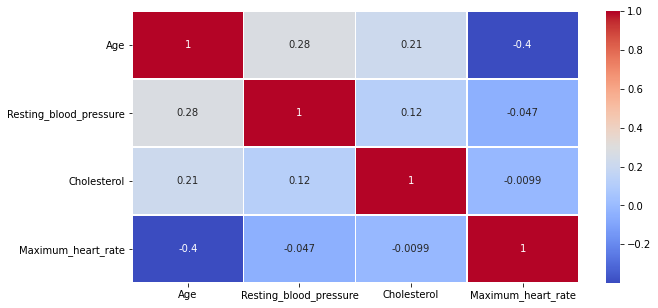

In [21]:
df2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

<h1><font color='turquoise'><strong></strong></font></h1>

Model Selection and Training

In [5]:
#Libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import accuracy_score,confusion_matrix
import scikitplot as skplt
from sklearn import metrics

In [5]:
x = df.drop(['target'], axis = 1)
y = df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [9]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [10]:
accuracy = []

LOGISTIC REGRESSION

In [11]:
C = [0.01,0.1, 1, 5, 10]

Log = LogisticRegression()

parameters = {'C': [.1 ,2, 5, 10, 15, 20]}

log_regressor = GridSearchCV(Log, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(x_train, y_train)
log_regressor.best_params_

{'C': 0.1}

In [76]:
model1 = LogisticRegression(C=15)
model1.fit(x_train,y_train)
accuracy1 = model1.score(x_test,y_test)
accuracy.append(accuracy1)
print('Logistic Regression Accuracy -->',((accuracy1)*100))

Logistic Regression Accuracy --> 88.52459016393442


RANDOM FOREST CLASSIFIER

In [13]:
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =5)
RFClassifier.fit(x_train, y_train)
RFClassifier.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 250}

In [67]:
model6 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 250, random_state = 5)
model6.fit(x_train,y_train)
accuracy6 = model6.score(x_test,y_test)
accuracy.append(accuracy6)
print('Random Forest Classifier Accuracy -->',((accuracy6)*100))

Random Forest Classifier Accuracy --> 90.1639344262295


K-NEAREST NEIGHBOR

In [31]:
model8 = KNeighborsClassifier(n_neighbors = 5)
model8.fit(x_train,y_train)
accuracy8 = model8.score(x_test,y_test)
accuracy.append(accuracy8)
print('KNN Accuracy -->',((accuracy8)*100))

KNN Accuracy --> 80.32786885245902


SUPPORT VECTOR MACHINE

In [68]:
penalty = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']

SVM = LinearSVC()

parameters = {'penalty':['l1','l2'],'C': [.01,.1,1,5,10,15,20],'loss':['hinge','squared_hinge']}

SVM_classifier = GridSearchCV(SVM, parameters, scoring='neg_mean_squared_error' ,cv =5)
SVM_classifier.fit(x_train, y_train)
SVM_classifier.best_params_

{'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'}

In [70]:
model3 = LinearSVC(C = 0.1,loss = 'hinge',penalty = 'l2')
model3.fit(x_train,y_train)
accuracy3 = model3.score(x_test,y_test)
accuracy.append(accuracy3)
print('SVM Classifier Accuracy -->',((accuracy3)*100))

SVM Classifier Accuracy --> 86.88524590163934


DECISION TREE CLASSIFIER

In [71]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(x_train, y_train)
tree_classifier.best_params_

{'criterion': 'entropy'}

In [74]:
model2 = DecisionTreeClassifier(criterion = 'entropy')
model2.fit(x_train,y_train)
accuracy2 = model2.score(x_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 86.88524590163934


PRINTING THE ACCURACIES OF ALL ALGORITHMS

In [77]:
data = [['Logistic Regression',accuracy1],['Decision Tree',accuracy2],['SVM',accuracy3],['Random Forest Classifier',accuracy6],['K-Nearest',accuracy8]]
dataframe = pd.DataFrame(data,columns=['Model','Accuracy'])
dataframe = dataframe.sort_values(by='Accuracy',ascending=False)
dataframe

,Model,Accuracy
3,Random Forest Classifier,0.901639
0,Logistic Regression,0.885246
1,Decision Tree,0.868852
2,SVM,0.868852
4,K-Nearest,0.819672


DROPPING SOME ATTRIBUTES TO CHECK ACCURACY IN PREDICTION

In [6]:
y = df['target']
modified_df=df.drop(['target'], axis = 1)
modified_df=modified_df.drop(['age'],axis=1)
modified_df=modified_df.drop(['trestbps'],axis=1)
modified_df=modified_df.drop(['chol'],axis=1)
modified_df=modified_df.drop(['restecg'],axis=1)
modified_df=modified_df.drop(['thalach'],axis=1)
mx=modified_df
mx.head()

,sex,cp,fbs,exang,oldpeak,slope,ca,thal
0,1,3,1,0,2.3,0,0,1
1,1,2,0,0,3.5,0,0,2
2,0,1,0,0,1.4,2,0,2
3,1,1,0,0,0.8,2,0,2
4,0,0,0,1,0.6,2,0,2


In [7]:
mx_train, mx_test, y_train, y_test = train_test_split(mx,y,test_size = 0.20, random_state = 5)

In [8]:
feature_scaler = MinMaxScaler()
mx_train = feature_scaler.fit_transform(mx_train)
mx_test = feature_scaler.transform(mx_test)

Scaled the data for better result.

In [11]:
accuracy = []

List which will store the accuracy value for all models used.

# Logistic Regression

In [36]:
C = [0.01,0.1, 1, 5, 10]

Log = LogisticRegression()

parameters = {'C': [.1 ,2, 5, 10, 15, 20]}

log_regressor = GridSearchCV(Log, parameters, scoring='neg_mean_squared_error' ,cv =5)
log_regressor.fit(mx_train, y_train)
log_regressor.best_params_

{'C': 2}

In [38]:
model1 = LogisticRegression(C=15)
model1.fit(mx_train,y_train)
accuracy1 = model1.score(mx_test,y_test)
accuracy.append(accuracy1)
print('Logistic Regression Accuracy -->',((accuracy1)*100))

Logistic Regression Accuracy --> 86.88524590163934


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

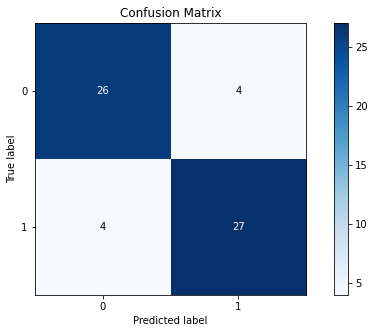

In [39]:
pred1 = model1.predict(mx_test)
matrix1 = (y_test,pred1)
skplt.metrics.plot_confusion_matrix(y_test, pred1,figsize=(10,5))

This shows there were problem in only 8 values, otherwise all the values were predicted right.

# Decision Trees

In [40]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(mx_train, y_train)
tree_classifier.best_params_

{'criterion': 'entropy'}

In [41]:
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(mx_train,y_train)
accuracy2 = model2.score(mx_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 86.88524590163934


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

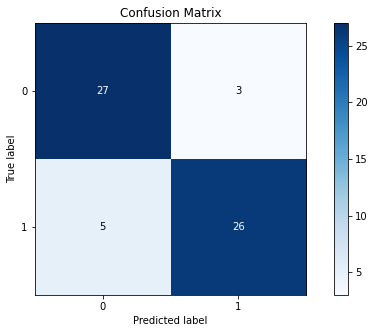

In [42]:
pred2 = model2.predict(mx_test)
matrix2 = (y_test,pred2)
skplt.metrics.plot_confusion_matrix(y_test ,pred2 ,figsize=(10,5))

This shows there were problem in 8 values, otherwise all the values were predicted right.

# Support Vector Machine

In [45]:
penalty = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']

SVM = LinearSVC()

parameters = {'penalty':['l1','l2'],'C': [.01,.1,1,5,10,15,20],'loss':['hinge','squared_hinge']}

SVM_classifier = GridSearchCV(SVM, parameters, scoring='neg_mean_squared_error' ,cv =5)
SVM_classifier.fit(mx_train, y_train)
SVM_classifier.best_params_

{'C': 20, 'loss': 'hinge', 'penalty': 'l2'}

In [46]:
model3 = LinearSVC(C = 20,loss = 'hinge',penalty = 'l2')
model3.fit(mx_train,y_train)
accuracy3 = model3.score(mx_test,y_test)
accuracy.append(accuracy3)
print('SVM Classifier Accuracy -->',((accuracy3)*100))

SVM Classifier Accuracy --> 86.88524590163934


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

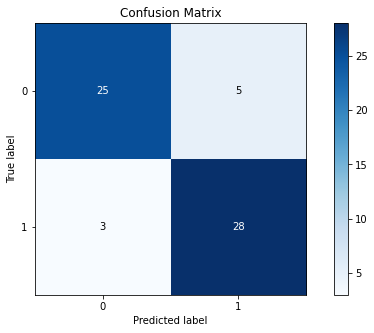

In [52]:
pred3 = model3.predict(mx_test)
matrix3 = (y_test,pred3)
skplt.metrics.plot_confusion_matrix(y_test ,pred3 ,figsize=(10,5))

This shows there were problem in 8 values, otherwise all the values were predicted right.

# Gaussian Naive Bayes

In [51]:
model4 = GaussianNB()

model4.fit(mx_train, y_train)
accuracy4 = model4.score(mx_test,y_test)
accuracy.append(accuracy4)
print('Gaussian NB Accuracy -->',((accuracy4)*100))

Gaussian NB Accuracy --> 85.24590163934425


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

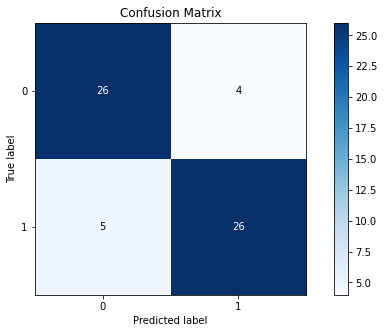

In [52]:
pred4 = model4.predict(mx_test)
matrix4 = (y_test,pred4)
skplt.metrics.plot_confusion_matrix(y_test ,pred4 ,figsize=(10,5))

This shows there were problem in 9 values, otherwise all the values were predicted right.

# Multinomial Naive Bayes

In [53]:
model5 = MultinomialNB()

model5.fit(mx_train, y_train)
accuracy5 = model5.score(mx_test,y_test)
accuracy.append(accuracy5)
print('Multinomial NB Accuracy -->',((accuracy5)*100))

Multinomial NB Accuracy --> 83.60655737704919


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

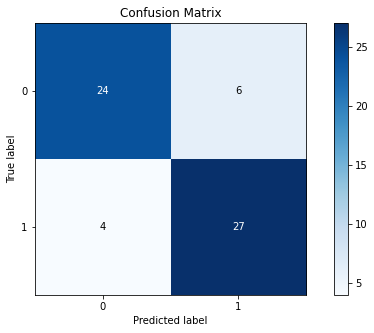

In [54]:
pred5 = model5.predict(mx_test)
matrix5 = (y_test,pred5)
skplt.metrics.plot_confusion_matrix(y_test ,pred5 ,figsize=(10,5))

This shows there were problem in only 10 values, otherwise all the values were predicted right.

# Random Forest Classifier

In [9]:
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =5)
RFClassifier.fit(mx_train, y_train)
RFClassifier.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 250}

In [12]:
model6 = RandomForestClassifier(criterion = 'entropy',max_features = 'auto',n_estimators = 250, random_state = 5)
model6.fit(mx_train,y_train)
accuracy6 = model6.score(mx_test,y_test)
accuracy.append(accuracy6)
print('Random Forest Classifier Accuracy -->',((accuracy6)*100))

Random Forest Classifier Accuracy --> 88.52459016393442


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

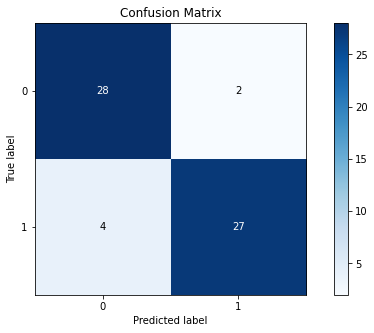

In [74]:
pred6 = model6.predict(mx_test)
matrix6 = (y_test,pred6)
skplt.metrics.plot_confusion_matrix(y_test ,pred6 ,figsize=(10,5))

This shows there were problem in only 6 values, otherwise all the values were predicted right.

# Gradient Boosting Classifier


In [55]:
n_estimators = [250,500,750,1000]
loss = ['deviance','exponential']
max_features = ['auto','sqrt','log2']

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2']}

GBClassifier = GridSearchCV(GB, parameters, scoring='neg_mean_squared_error' ,cv =5)
GBClassifier.fit(mx_train, y_train)
GBClassifier.best_params_

{'loss': 'deviance', 'max_features': 'log2', 'n_estimators': 500}

In [57]:
model7 = GradientBoostingClassifier(loss = 'deviance',max_features = 'log2',n_estimators = 500, random_state = 5)
model7.fit(mx_train,y_train)
accuracy7 = model7.score(mx_test,y_test)
accuracy.append(accuracy7)
print('Gradient Boosting Classifier Accuracy -->',((accuracy7)*100))

Gradient Boosting Classifier Accuracy --> 85.24590163934425


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

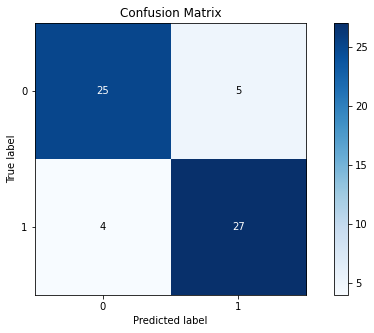

In [58]:
pred7 = model7.predict(mx_test)
matrix7 = (y_test,pred7)
skplt.metrics.plot_confusion_matrix(y_test ,pred7 ,figsize=(10,5))

This shows there were problem in 9 values, otherwise all the values were predicted right.

# K-Nearest Neighbors

Text(0, 0.5, 'Accuracy')

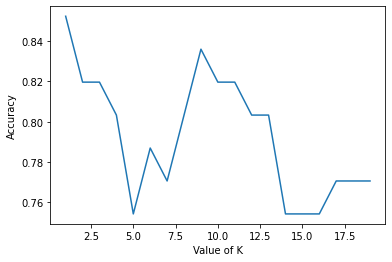

In [59]:
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(mx_train,y_train)
    y_pred = knn.predict(mx_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [60]:
model8 = KNeighborsClassifier(n_neighbors = 3)
model8.fit(mx_train,y_train)
accuracy8 = model8.score(mx_test,y_test)
accuracy.append(accuracy8)
print('KNN Accuracy -->',((accuracy8)*100))

KNN Accuracy --> 81.9672131147541


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

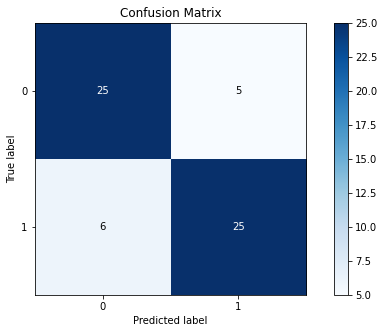

In [97]:
pred8 = model8.predict(mx_test)
matrix8 = (y_test,pred8)
skplt.metrics.plot_confusion_matrix(y_test ,pred8 ,figsize=(10,5))

This shows there were problem in only 11 values, otherwise all the values were predicted right.

# Overall accuracies obtained by the models

In [61]:
data = [['Logistic Regression',accuracy1],['Decision Tree',accuracy2],['SVM',accuracy3],['Guassian Naive Bayes',accuracy4],['Multinomial Naive Bayes',accuracy5],['Random Forest Classifier',accuracy6],['K-Nearest',accuracy8]]
dataframe = pd.DataFrame(data,columns=['Model','Accuracy'])
dataframe = dataframe.sort_values(by='Accuracy',ascending=False)
dataframe

,Model,Accuracy
5,Random Forest Classifier,0.885246
0,Logistic Regression,0.868852
1,Decision Tree,0.868852
2,SVM,0.868852
3,Guassian Naive Bayes,0.852459
4,Multinomial Naive Bayes,0.836066
6,K-Nearest,0.819672


FROM ABOVE TABLE WE CAN UNDERSTAND THAT EVEN THOUGH WE DROPPED SOME ATTRIBUTES ACCURACY FOR SOME ALOGORITHMS REMAINS SAME.

TESTING

In [122]:
input_data=(0,1,0,0,1.4,2,0,2)
id_as_narray=np.asarray(input_data)
input_data_reshaped=id_as_narray.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if prediction==0:
    print('Person Does not have Heart disease prediction')
else:
    print('person has Heart disease')

person has Heart disease


In [123]:
input_data=(1,3,1,0,2.3,0,0,1)
id_as_narray=np.asarray(input_data)
input_data_reshaped=id_as_narray.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if prediction==0:
    print('Person Does not have Heart disease prediction')
else:
    print('person has Heart disease')

person has Heart disease


In [124]:
input_data=(0,3,1,0,1,2,0,2)
id_as_narray=np.asarray(input_data)
input_data_reshaped=id_as_narray.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if prediction==0:
    print('Person Does not have Heart disease prediction')
else:
    print('person has Heart disease')

person has Heart disease


In [13]:
input_data=(1,0,0,1,1.5,1,3,2)
id_as_narray=np.asarray(input_data)
input_data_reshaped=id_as_narray.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if prediction==0:
    print('Person Does not have Heart disease')
else:
    print('person has Heart disease')

Person Does not have Heart disease


In [17]:
input_data=(0,1,0,0,2,1,3,2)
id_as_narray=np.asarray(input_data)
input_data_reshaped=id_as_narray.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if prediction==0:
    print('Person Does not have Heart disease')
else:
    print('person has Heart disease')

Person Does not have Heart disease
